In [1]:
%matplotlib inline

In [2]:
from __future__ import print_function
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
from obspy import read, Stream
import os
import glob
from obspy.io.xseed import Parser
from obspy import read_inventory
from obspy.signal import PPSD

plt.style.use('ggplot')

In [3]:
st = read("https://examples.obspy.org/BW.KW1..EHZ.D.2011.037")
tr = st.select(id="BW.KW1..EHZ")[0]

In [4]:
tr.stats

         network: BW
         station: KW1
        location: 
         channel: EHZ
       starttime: 2011-02-06T00:00:00.935000Z
         endtime: 2011-02-06T05:07:21.115000Z
   sampling_rate: 200.0
           delta: 0.005
            npts: 3688037
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'encoding': 'STEIM2', 'filesize': 18434560, 'record_length': 512, 'byteorder': '>', 'number_of_records': 36005})

In [5]:
parser = Parser("https://examples.obspy.org/dataless.seed.BW_KW1")
ppsd = PPSD(tr.stats, metadata=parser)

In [6]:
parser

Networks:
	BW (BayernNetz)
Stations:
	BW.KW1 (Garching, Kirchweidach, BW-Net)
Channels:
	BW.KW1..EHE | 200.00 Hz | Trillium-C seismometer | 2010-12-02 -  | Lat: 48.1, Lng: 12.6
	BW.KW1..EHN | 200.00 Hz | Trillium-C seismometer | 2010-12-02 -  | Lat: 48.1, Lng: 12.6
	BW.KW1..EHZ | 200.00 Hz | Trillium-C seismometer | 2010-12-02 -  | Lat: 48.1, Lng: 12.6

In [7]:
ppsd.add(st)

True

In [13]:
print(ppsd.times_processed)

[UTCDateTime(2011, 2, 6, 0, 0, 0, 935000), UTCDateTime(2011, 2, 6, 0, 30, 0, 935000), UTCDateTime(2011, 2, 6, 1, 0, 0, 935000), UTCDateTime(2011, 2, 6, 1, 30, 0, 935000), UTCDateTime(2011, 2, 6, 2, 0, 0, 935000), UTCDateTime(2011, 2, 6, 2, 30, 0, 935000), UTCDateTime(2011, 2, 6, 3, 0, 0, 935000), UTCDateTime(2011, 2, 6, 3, 30, 0, 935000), UTCDateTime(2011, 2, 6, 4, 0, 0, 935000), UTCDateTime(2011, 2, 6, 4, 30, 0, 935000), UTCDateTime(2011, 2, 6, 5, 0, 0, 935000), UTCDateTime(2011, 2, 6, 5, 30, 0, 935000), UTCDateTime(2011, 2, 6, 6, 0, 0, 935000), UTCDateTime(2011, 2, 6, 6, 30, 0, 935000), UTCDateTime(2011, 2, 6, 7, 0, 0, 935000), UTCDateTime(2011, 2, 6, 7, 30, 0, 935000), UTCDateTime(2011, 2, 6, 8, 0, 0, 935000), UTCDateTime(2011, 2, 6, 8, 30, 0, 935000), UTCDateTime(2011, 2, 6, 9, 0, 0, 935000), UTCDateTime(2011, 2, 6, 9, 30, 0, 935000), UTCDateTime(2011, 2, 6, 10, 0, 0, 935000), UTCDateTime(2011, 2, 6, 10, 30, 0, 935000), UTCDateTime(2011, 2, 6, 11, 0, 0, 935000), UTCDateTime(2011, 2

In [9]:
print("number of psd segments:", len(ppsd.times_processed))

number of psd segments: 47


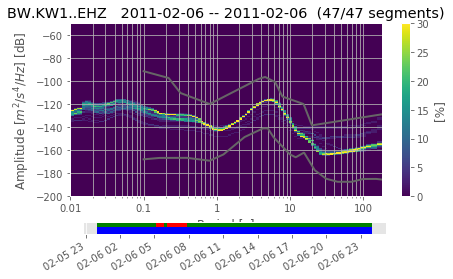

In [10]:
ppsd.plot()

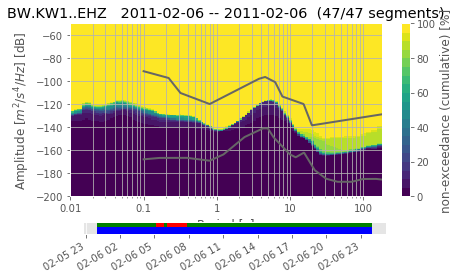

In [11]:
ppsd.plot(cumulative=True)


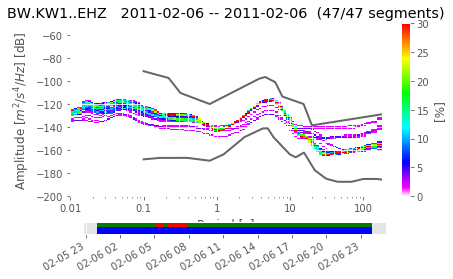

In [12]:
from obspy.imaging.cm import pqlx
ppsd.plot(cmap=pqlx)

In [13]:
SLP01_list = []
SLP01_listS = []

for root, dirs, files in os.walk('/media/diogo/BP-PABIP/DADOS/redeBP-BB/BPPF/160909/2016/07/'):
    for RFfile in files:
        if RFfile.startswith('BP.SN404.HHZ_MC-PH1_0404_'):
            SLP01_list.append(os.path.join(root, RFfile))
SLP01_listS = sorted(SLP01_list)

In [14]:
st = Stream()
for i,j in enumerate(SLP01_listS):
    st += read(j)

In [15]:
st_mes_07 = st.merge()

In [16]:
st_mes_07

0 Trace(s) in Stream:


In [96]:
tr = st[0]

In [97]:
tr

BP.SN404..HHZ | 2016-07-07T14:24:44.870000Z - 2016-07-31T23:59:59.990000Z | 100.0 Hz, 210811513 samples

In [131]:
tr.stats.station = 'BPPF'

In [132]:
tr.stats

         network: BP
         station: BPPF
        location: 
         channel: HHZ
       starttime: 2016-07-07T14:24:44.870000Z
         endtime: 2016-07-31T23:59:59.990000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 210811513
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'encoding': 'STEIM1', 'filesize': 339968, 'record_length': 512, 'byteorder': '>', 'number_of_records': 664})

In [133]:
tr.stats.channel

'HHZ'

In [134]:
tr.stats.location

''

In [135]:
tr.stats.station

'BPPF'

In [136]:
tr.stats.sampling_rate

100.0

In [145]:
parser = Parser('/home/diogo/dados_doutorado/parnaiba_basin/cross_corr/cross_corr_dataless/BB.BPPF.dataless')

In [146]:
parser

Networks:
	BB (BP)
Stations:
	BB.BPPF (Sediment)
Channels:
	BB.BPPF..HHE | 100.00 Hz |  | 2016-01-01 -  | Lat: -6.2, Lng: -47.3
	BB.BPPF..HHN | 100.00 Hz |  | 2016-01-01 -  | Lat: -6.2, Lng: -47.3
	BB.BPPF..HHZ | 100.00 Hz |  | 2016-01-01 -  | Lat: -6.2, Lng: -47.3

In [147]:
ppsd.channel

'HHZ'

In [148]:
ppsd.sampling_rate

100.0

In [149]:
ppsd.location

''

In [164]:
ppsd = PPSD(tr.stats, metadata=parser.get_paz('BB.BPPF..HHZ'))

In [165]:
ppsd.add(st)

True

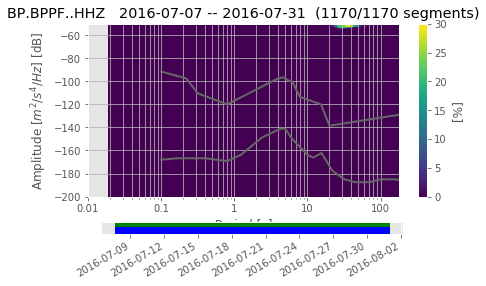

In [166]:
ppsd.plot() 

In [169]:
ppsd.times_processed

[2016-07-07T14:24:44.870000Z,
 2016-07-07T14:54:44.870000Z,
 2016-07-07T15:24:44.870000Z,
 2016-07-07T15:54:44.870000Z,
 2016-07-07T16:24:44.870000Z,
 2016-07-07T16:54:44.870000Z,
 2016-07-07T17:24:44.870000Z,
 2016-07-07T17:54:44.870000Z,
 2016-07-07T18:24:44.870000Z,
 2016-07-07T18:54:44.870000Z,
 2016-07-07T19:24:44.870000Z,
 2016-07-07T19:54:44.870000Z,
 2016-07-07T20:24:44.870000Z,
 2016-07-07T20:54:44.870000Z,
 2016-07-07T21:24:44.870000Z,
 2016-07-07T21:54:44.870000Z,
 2016-07-07T22:24:44.870000Z,
 2016-07-07T22:54:44.870000Z,
 2016-07-07T23:24:44.870000Z,
 2016-07-07T23:54:44.870000Z,
 2016-07-08T00:24:44.870000Z,
 2016-07-08T00:54:44.870000Z,
 2016-07-08T01:24:44.870000Z,
 2016-07-08T01:54:44.870000Z,
 2016-07-08T02:24:44.870000Z,
 2016-07-08T02:54:44.870000Z,
 2016-07-08T03:24:44.870000Z,
 2016-07-08T03:54:44.870000Z,
 2016-07-08T04:24:44.870000Z,
 2016-07-08T04:54:44.870000Z,
 2016-07-08T05:24:44.870000Z,
 2016-07-08T05:54:44.870000Z,
 2016-07-08T06:24:44.870000Z,
 2016-07-0